# Caso de estudio del mundo real: sistema de recomendación de becas para estudiantes

El objetivo principal de lo que vimos fue obtener una comprensión sólida de todo el panorama del aprendizaje automático, comprender conceptos cruciales, construir sobre los fundamentos básicos,
y entender cómo ejecutar proyectos de *machine learning* con la ayuda de flujos de trabajo. Nos basamos en el proceso CRISP-DM 

Juntemos todo esto para tomar un caso de estudio muy básico del mundo real, mediante la construcción de un flujo de aprendizaje automático supervisado en un conjunto de datos "de juguete". 

Nuestro problema a resolver es el siguiente. Tenemos datos de varios estudiantes con múltiples atributos: calificaciones,
rendimiento y puntajes. ¿Es posible construir un modelo basado en datos históricos ​​para predecir la posibilidad de que un estudiante reciba una beca para un proyecto de investigación?

# Objetivo
Tiene datos históricos de rendimiento de los estudiantes y los resultados de las recomendaciones de becas en forma de
un archivo de valores separados por comas llamado `MLII - clase5 - datos.csv`. Cada muestra de datos consta de los siguientes
atributos.



*   Nombre (el nombre del estudiante)
*   Calificacion (calificación general obtenida)
*   TratoPersonal (si fueron diligentes durante su estadía)
*   PuntajeInv (notas obtenidas en su trabajo de investigación)
*   PuntajeProy (notas obtenidas en el proyecto)
*   Recomendar (si recibieron la recomendación de beca)

Su principal objetivo es construir un modelo predictivo basado en estos datos de manera que pueda predecir cualquier
futuro estudiante si serán recomendados para la beca en función de su desempeño

## Recopilación de datos


In [1]:
import pandas as pd
# Apagar mensajes
pd.options.mode.chained_assignment = None  # default='warn'

# Obtener los datos

# Si se usa Google Colab
#from google.colab import files
#uploaded = files.upload()

#import io
#df = pd.read_csv(io.BytesIO(uploaded['MLII - Clase 5 - datos.csv']))

# Si se usa Jupyter en la computadora
df = pd.read_csv('2 MLII - Clase 5 - datos.csv')
df

,Nombre,Calificacion,TratoPersonal,PuntajeInv,PuntajeProy,Recomendar
0,Marina,A,B,90,85,S
1,Juan,C,M,85,51,S
2,David,F,M,10,17,N
3,Susana,B,B,75,71,N
4,Marvin,E,M,20,30,N
5,Daniela,A,B,92,79,S
6,Roberto,B,B,60,59,N
7,Ana,C,B,75,33,N


In [2]:
df.shape

(8, 6)

## Preparación de Datos

### Generación y selección de atributos


In [3]:
# Variables de ingreso (atributos)
feature_names = ['Calificacion', 'TratoPersonal', 'PuntajeInv', 'PuntajeProy']
X = df[feature_names]

# Variable objetivo
outcome_name = ['Recomendar']
y = df[outcome_name]

In [4]:
# Ver atributos
X

,Calificacion,TratoPersonal,PuntajeInv,PuntajeProy
0,A,B,90,85
1,C,M,85,51
2,F,M,10,17
3,B,B,75,71
4,E,M,20,30
5,A,B,92,79
6,B,B,60,59
7,C,B,75,33


In [5]:
# Reemplazar por números y ver etiquetas
y = y.replace(['S','N'],[1,0])
y

C:\Users\carlos\AppData\Local\Temp\ipykernel_11040\3348578292.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace(['S','N'],[1,0])


,Recomendar
0,1
1,1
2,0
3,0
4,0
5,1
6,0
7,0


In [6]:
# Listar atributos por tipo
numeric_feature_names = ['PuntajeInv', 'PuntajeProy']
categoricial_feature_names = ['Calificacion', 'TratoPersonal']

### Escalar atributos numéricos

Algunos modelos de machine learning, por ejemplo los que utilizan la distancia entre puntos, pueden verse afectados si las características tienen diferentes escalas. Por ejemplo, si una variable está en un rango de 0 a 1000 y otra de 0 a 1, la primera dominará las decisiones del modelo solo por su magnitud. Escalar los atributos llevando todas las características a una escala similar permite que el modelo trate todas las características de manera equitativa.

In [7]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

# Entrenar el escalador con los atributos numéricos
ss.fit(X[numeric_feature_names])

# Aplicar el escalador
X[numeric_feature_names] = ss.transform(X[numeric_feature_names])

# Ver el resultado
X

,Calificacion,TratoPersonal,PuntajeInv,PuntajeProy
0,A,B,0.899583,1.376650
1,C,M,0.730648,-0.091777
2,F,M,-1.803390,-1.560203
3,B,B,0.392776,0.772004
4,E,M,-1.465519,-0.998746
5,A,B,0.967158,1.117516
6,B,B,-0.114032,0.253735
7,C,B,0.392776,-0.869179


### Manipulación de atributos categóricos

In [8]:
X = pd.get_dummies(X, columns=categoricial_feature_names)
# Ver nuevos atributos categóricos
X

,PuntajeInv,PuntajeProy,Calificacion_A,Calificacion_B,Calificacion_C,Calificacion_E,Calificacion_F,TratoPersonal_B,TratoPersonal_M
0,0.899583,1.376650,True,False,False,False,False,True,False
1,0.730648,-0.091777,False,False,True,False,False,False,True
2,-1.803390,-1.560203,False,False,False,False,True,False,True
3,0.392776,0.772004,False,True,False,False,False,True,False
4,-1.465519,-0.998746,False,False,False,True,False,False,True
5,0.967158,1.117516,True,False,False,False,False,True,False
6,-0.114032,0.253735,False,True,False,False,False,True,False
7,0.392776,-0.869179,False,False,True,False,False,True,False


In [9]:
# Listar los nuevos atributos categóricos
categorical_engineered_features = list(set(X.columns) - set(numeric_feature_names))
categorical_engineered_features

['Calificacion_F',
 'Calificacion_B',
 'Calificacion_E',
 'Calificacion_A',
 'TratoPersonal_B',
 'Calificacion_C',
 'TratoPersonal_M']

## Modelado

In [10]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# Entrenar el modelo
lr = LogisticRegression() 
model = lr.fit(X.values,y.values.ravel())
# Ver los parámetros del modelo
model

LogisticRegression()

## Evaluación del modelo

In [11]:
y_pred = model.predict(X.values)

In [12]:
y_pred 

array([1, 1, 0, 0, 0, 1, 0, 0], dtype=int64)

In [13]:
# Evaluación simple sobre datos de entrenamiento
df['Predicciones'] = y_pred
df.head(7)

,Nombre,Calificacion,TratoPersonal,PuntajeInv,PuntajeProy,Recomendar,Predicciones
0,Marina,A,B,90,85,S,1
1,Juan,C,M,85,51,S,1
2,David,F,M,10,17,N,0
3,Susana,B,B,75,71,N,0
4,Marvin,E,M,20,30,N,0
5,Daniela,A,B,92,79,S,1
6,Roberto,B,B,60,59,N,0


In [14]:
# Evaluamos el modelo
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
import matplotlib.pyplot as plt

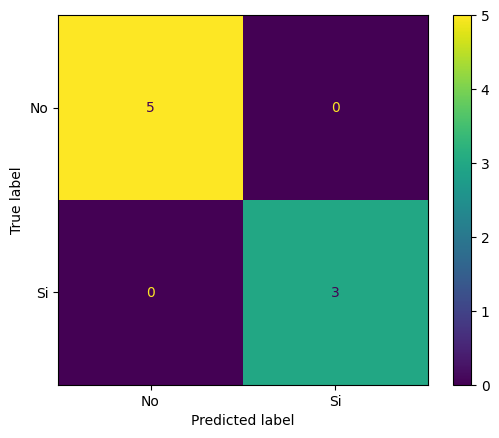

In [15]:
cm = confusion_matrix(y, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['No','Si'])
cmd.plot()


In [16]:
print('Accuracy:', float(accuracy_score(y,y_pred))*100, '%')
print('Classification Stats:')
print(classification_report(y,y_pred))
print()

Accuracy: 100.0 %
Classification Stats:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         3

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8




## Despliegue del modelo

In [17]:
import joblib
import os
# Guardamos los modelos para poder disponibilizarlos
if not os.path.exists('Model'):
    os.mkdir('Model')
if not os.path.exists('Scaler'):
    os.mkdir('Scaler') 
    
joblib.dump(model, r'Model/model.pickle') 
joblib.dump(ss, r'Scaler/scaler.pickle') 

['Scaler/scaler.pickle']

##### Si quiero guardarlo en mi computadora desde Colab
from google.colab import files

files.download('model.pickle')

files.download('scaler.pickle')


## Predicción

In [18]:
# Leemos el modelo y el escalador
model = joblib.load(r'Model/model.pickle')
scaler = joblib.load(r'Scaler/scaler.pickle')

In [19]:
## Obtenemos datos nuevos
new_data = pd.DataFrame([{'Nombre': 'Marcelo', 'Calificacion': 'F', 'TratoPersonal': 'M', 'PuntajeInv': 30, 'PuntajeProy': 20},
                  {'Nombre': 'Lucrecia', 'Calificacion': 'A', 'TratoPersonal': 'B', 'PuntajeInv': 78, 'PuntajeProy': 80}])
new_data = new_data[['Nombre', 'Calificacion', 'TratoPersonal', 'PuntajeInv', 'PuntajeProy']]
new_data

,Nombre,Calificacion,TratoPersonal,PuntajeInv,PuntajeProy
0,Marcelo,F,M,30,20
1,Lucrecia,A,B,78,80


In [20]:
## Preparación de datos
prediction_features = new_data[feature_names]

# Escalado
prediction_features[numeric_feature_names] = scaler.transform(prediction_features[numeric_feature_names])

# Manupulación de variables categóricas
prediction_features = pd.get_dummies(prediction_features, columns=categoricial_feature_names)

# Ver el conjunto de atributos
prediction_features

,PuntajeInv,PuntajeProy,Calificacion_A,Calificacion_F,TratoPersonal_B,TratoPersonal_M
0,-1.127647,-1.430636,False,True,False,True
1,0.494137,1.160705,True,False,True,False


In [21]:
# Agregamos columnas faltantes
current_categorical_engineered_features = set(prediction_features.columns) - set(numeric_feature_names)
missing_features = set(categorical_engineered_features) - current_categorical_engineered_features
for feature in missing_features:
    # y las llenamos con ceros, porque no tenemos datos de esas columnas
    prediction_features[feature] = [0] * len(prediction_features) 

# Listamos el conjunto final
prediction_features

,PuntajeInv,PuntajeProy,Calificacion_A,Calificacion_F,TratoPersonal_B,TratoPersonal_M,Calificacion_B,Calificacion_E,Calificacion_C
0,-1.127647,-1.430636,False,True,False,True,0,0,0
1,0.494137,1.160705,True,False,True,False,0,0,0


In [22]:
prediction_features = prediction_features[['PuntajeInv','PuntajeProy','Calificacion_A','Calificacion_B','Calificacion_C','Calificacion_E','Calificacion_F','TratoPersonal_B',
                        'TratoPersonal_M']]

In [23]:
prediction_features

,PuntajeInv,PuntajeProy,Calificacion_A,Calificacion_B,Calificacion_C,Calificacion_E,Calificacion_F,TratoPersonal_B,TratoPersonal_M
0,-1.127647,-1.430636,False,0,0,0,True,False,True
1,0.494137,1.160705,True,0,0,0,False,True,False


In [24]:
## Predicción usando el modelo
predictions = model.predict(prediction_features.values)

In [25]:
## Resultados
new_data['Recommend'] = predictions
new_data

,Nombre,Calificacion,TratoPersonal,PuntajeInv,PuntajeProy,Recommend
0,Marcelo,F,M,30,20,0
1,Lucrecia,A,B,78,80,1
